# Complete Regression - Lab

## Introduction
By now, you have created all the necessary functions to calculate the slope, intercept, best-fit line, prediction, and visualizations. In this lab you will put them all together to run a regression experiment and calculate the model loss. 

## Objectives

You will be able to:

* Perform a linear regression using self-constructed functions
* Calculate the coefficient of determination using self-constructed functions
* Use the coefficient of determination to determine model performance

## The formulas

**Slope**: 
$\hat m = \dfrac{\overline{x}*\overline{y}-\overline{xy}}{(\overline{x})^2-\overline{x^2}}$


**Intercept**: $ \hat c = \bar{y} - \hat m\bar{x}$

**Prediction**: $\hat{y} = \hat mx + \hat c$

**R-Squared**: 
$ R^2 = 1- \dfrac{SS_{RES}}{SS_{TOT}} = 1 - \dfrac{\sum_i(y_i - \hat y_i)^2}{\sum_i(y_i - \overline y_i)^2} $


Use the Python functions created earlier to implement these formulas to run a regression analysis using x and y as input variables. 

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
# Combine all the functions created so far to run a complete regression experiment. 
# Produce an output similar to the one shown below. 

X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype=np.float64)
Y = np.array([7, 7, 8, 9, 9, 10, 10, 11, 11, 12], dtype=np.float64)

def linear_reg(X,Y):
    '''This function takes in two n-vectors and produces a linear regression model with summary stats
    '''
    # make iterables into np.arrys just in case they weren't
    X = np.array(X, dtype=np.float64)
    Y = np.array(Y, dtype=np.float64)
    #calc mean for X and Y
    X_bar = np.mean(X)
    Y_bar = np.mean(Y)
    #calc standard deviation for X and Y
    std_X = np.std(X)
    std_Y = np.std(Y)
    #calc correlation for X and Y
    corr_X_Y = np.corrcoef(X,Y)[0][1]
    #get regression line slope with least-squares method
    m_hat = corr_X_Y*std_Y/std_X
    #calc regression intercept with regression slope
    c_hat = Y_bar - m_hat*X_bar
    #calc predicted values for model
    Y_hat = m_hat*X + c_hat
    # calc R_squared
    R_squared = 1 - (sum((Y - Y_hat)**2)/sum((Y - Y_bar)**2))
    print(
        f'''
        Basic Regression Diagnostics
        ----------------------------
        Slope: {round(m_hat,2)}
        Y-Intercept: {round(c_hat,2)}
        R_Squared: {round(R_squared,2)}
        ----------------------------
        Model: Y = {round(m_hat,2)} * X + {round(c_hat,2)}
    ''')
    plt.figure()
    plt.scatter(X,Y)
    plt.plot(X, Y_hat, color = 'red')
    print('''If you would to see the predictions for various values please input comma seperated values now ''')
    userInput = input()
    X_new = []
    for x in userInput.split(','):
        X_new.append(float(x))
    X_new = np.array(X_new)
    if len(X_new) == 0:
        pass
    else:
        print(X_new)
        Y_new = m_hat*X_new + c_hat
        plt.scatter(X_new, Y_new, c = 'red')
    plt.title('Linear Regression Model')
    plt.xlabel('Dependant Variable')
    plt.ylabel('Independant Variable')
    plt.show()


        Basic Regression Diagnostics
        ----------------------------
        Slope: 0.56
        Y-Intercept: 6.33
        R_Squared: 0.97
        ----------------------------
        Model: Y = 0.56 * X + 6.33
    
If you would to see the predictions for various values please input comma seperated values now 
1,2,3,4,5,6,7,8,9
[1. 2. 3. 4. 5. 6. 7. 8. 9.]


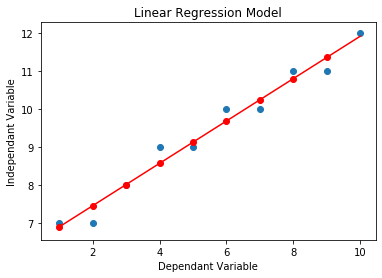

In [16]:
# Basic Regression Diagnostics
# ----------------------------
# Slope: 0.56
# Y-Intercept: 6.33
# R-Squared: 0.97
# ----------------------------
# Model: Y = 0.56 * X + 6.33
linear_reg(X,Y)


## Make Predictions

Predict and plot the value of y using regression line above for a new value of $x = 4.5$.

In [ ]:
# Make prediction for x = 4.5 and visualize on the scatter plot
plt.figure()
linear_reg(X,Y)
plt.scatter([4.5], [.56*4.5 + 6.33])
plt.show()

## Level up - Optional 
Load the "`heightweight.csv`" dataset. Use the height as an independent and weight as a dependent variable and draw a regression line to data using your code above. Calculate your R-Squared value for the model and try to predict new values of y. 

## Summary

In this lab, we ran a complete simple regression analysis experiment using functions created so far. Next up, you'll learn how you can use Python's built-in modules to perform similar analyses with a much higher level of sophistication. 